## Вариант 13

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Требуется решить задачу Коши для приведённой системы дифференциальных уравнений первого порядка:

$\frac{dx}{dt} = F_{x}(x, y)$, $\frac{dy}{dt} = F_{y}(x, y)$

методом Рунге-Кутты второго либо четвёртого порядка точности. Начальные условия:

$x(t_{0}) = x_{0}$, $y(t_{0}) = y_{0}$

Строить решение нужно до преодоления параметром $t$ точки $t_{0}$.
Относительная точность должна быть не хуже $10^{-5}$

Система уравнений:

$x^\prime = 2e^t + 2x + y$

$y^\prime = x + 2y - 3e^{4t}$

Начальные условия:

$x(t_{0}) = 2$, $y(t_{0}) = 0$

$t_{0} = 0, t_{1} = -2$

In [3]:
#x' = 2*e^t + 2*x + y
#y' = x + 2*y - 3*e^(4*t)
def F1(t, x, y):
    return 2*np.exp(t) + 2*x + y

def F2(t, x, y):
    return x + 2*y - 3*np.exp(4*t)

Метод Рунге-Кутты четвертого порядка точности: 

In [4]:
def R_G(low, high, h):
    t = []
    xi = []
    yi = []
    xi.append(2)
    yi.append(3)
    t.append(low)
    low += h
    i = 1
    while round(low, 4) <= high:
        # X
        k1_x = h * F1(low, xi[i - 1], yi[i - 1])
        k2_x = h * F1(low + h / 2, xi[i - 1] + k1_x / 2, yi[i - 1] + k1_x / 2)
        k3_x = h * F1(low + h / 2, xi[i - 1] + k2_x / 2, yi[i - 1] + k2_x / 2)
        k4_x = h * F1(low + h, xi[i - 1] + k3_x, yi[i - 1] + k3_x)
        xi.append(xi[i - 1] + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6)
        # Y
        k1_y = h * F2(low, xi[i - 1], yi[i - 1])
        k2_y = h * F2(low + h / 2, xi[i - 1] + k1_y / 2, yi[i - 1] + k1_y / 2)
        k3_y = h * F2(low + h / 2, xi[i - 1] + k2_y / 2, yi[i - 1] + k2_y / 2)
        k4_y = h * F2(low + h / 2, xi[i - 1] + k3_y, yi[i - 1] + k3_y)
        yi.append(yi[i - 1] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)
        
        t.append(low)
        low += h
        i += 1
    return t, xi, yi 

In [6]:
array_points = R_G(-2, 0, 0.2)

In [7]:
data = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T

Полученные точки прирешении системы ДУ:

In [8]:
data

,t,x,y
0,-2.000000e+00,2.000000,3.000000
1,-1.800000e+00,4.015793,5.189552
2,-1.600000e+00,7.756895,9.128989
3,-1.400000e+00,14.652066,16.247664
4,-1.200000e+00,27.304889,29.147278
5,-1.000000e+00,50.458328,52.563614
6,-8.000000e-01,92.750860,95.116667
7,-6.000000e-01,169.913506,172.494758
8,-4.000000e-01,310.589454,313.246016
9,-2.000000e-01,566.926303,569.308856


Построим график траеторий, порождённой этой последовательностью точек:

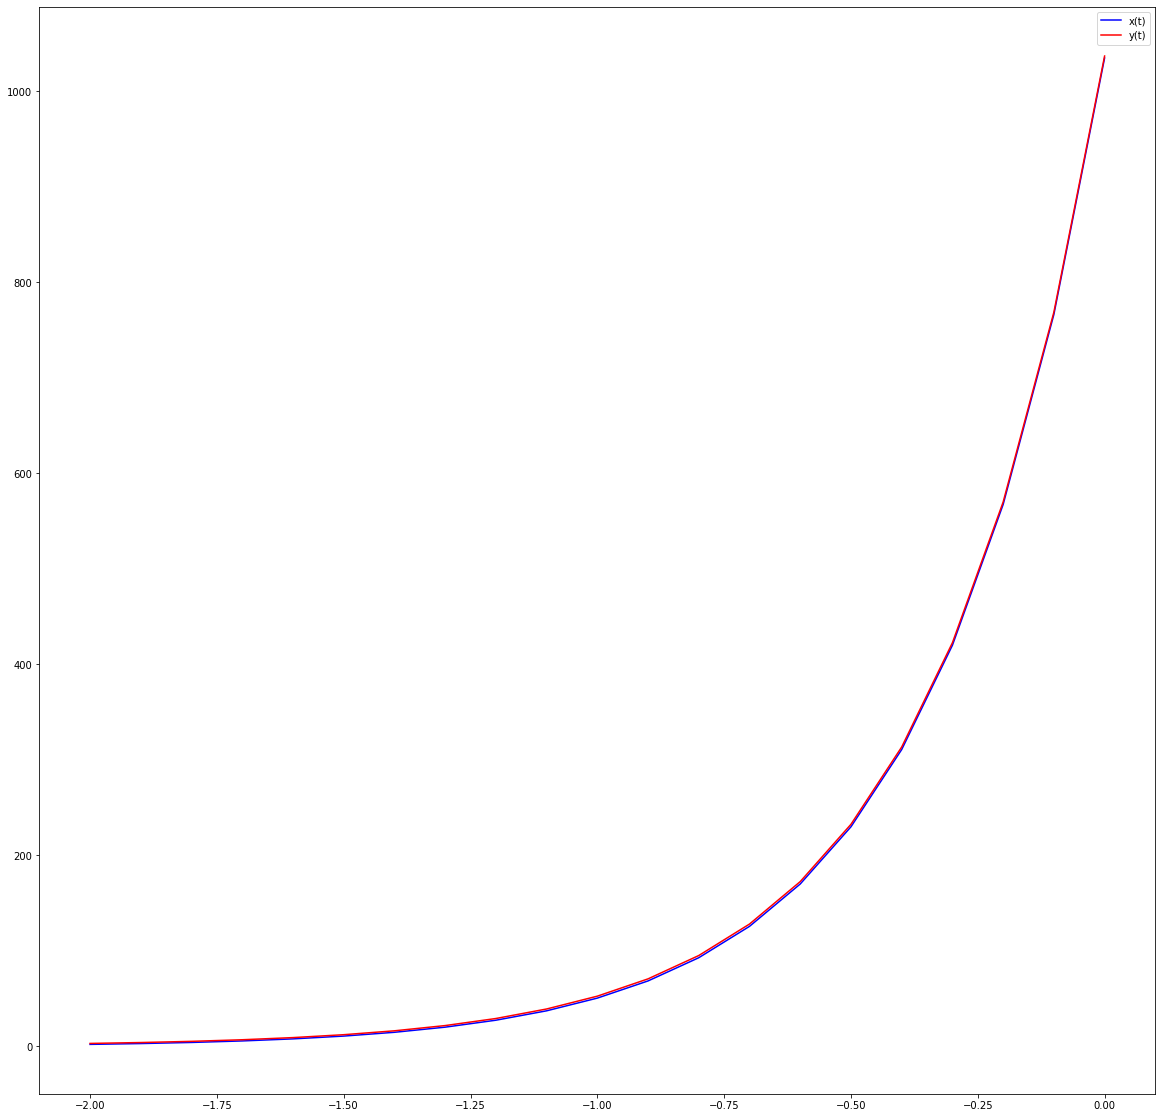

In [25]:
plt.figure(figsize(20, 20))
plt.plot(array_points[0], array_points[1], color = 'b', label = 'x(t)')
plt.plot(array_points[0], array_points[2], color = 'r', label = 'y(t)')
plt.legend(prop={'size': 10})
plt.show()

Правило Рунге оценки погрешности:

In [11]:
array_points = R_G(-2, 0, 0.2)
array_exp = R_G(-2, 0, 0.2)

exp = []
for i, x in enumerate(array_exp[1]):
    if i % 2 == 0 or i == len(array_exp[1]) - 1:
        exp.append(x)
        print(i,x)
        
e = []
for i in range(len(exp)):
    e.append( abs(array_points[1][i] - exp[i]) / 3 )

0 2
2 7.7568947749876
4 27.304888642697264
6 92.75086007268516
8 310.58945366725675
10 1033.8519923676888


In [75]:
e[0]

0.0

In [66]:
array_points = R_G(-2, 0, 1)

data_1 = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T
data_1

,t,x,y
0,-2.0,2.000000,3.000000
1,-1.0,43.009952,42.811495
2,0.0,717.229118,637.165136


In [67]:
array_points = R_G(-2, 0, 0.5)

data_05 = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T
data_05

,t,x,y
0,-2.0,2.000000,3.000000
1,-1.5,10.545161,12.044360
2,-1.0,49.095289,51.144015
3,-0.5,219.936415,221.642510
4,0.0,972.067624,965.629774


In [68]:
abs(data_1.iloc[1].x - data_05.iloc[2].x) / (2**4 - 1)

0.4056891535257563

In [69]:
array_points = R_G(-2, 0, 0.25)

data_025 = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T
data_025

,t,x,y
0,-2.00,2.000000,3.000000
1,-1.75,4.745477,5.971138
2,-1.50,10.676329,12.167881
3,-1.25,23.370039,25.166529
4,-1.00,50.394943,52.522787
5,-0.75,107.755704,110.198813
6,-0.50,229.287785,231.909409
7,-0.25,486.506763,488.842983
8,0.00,1030.537354,1031.246052


In [70]:
abs(data_025.iloc[4].x - data_01.iloc[2].x) / (2**4 - 1)

0.0866435599317621

In [73]:
array_points = R_G(-2, 0, 0.125)

data_125 = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T
data_125

,t,x,y
0,-2.000,2.000000,3.000000
1,-1.875,3.110840,4.212826
2,-1.750,4.749066,5.961732
3,-1.625,7.156791,8.489146
4,-1.500,10.686439,12.147651
5,-1.375,15.850914,17.450065
6,-1.250,23.396591,25.142285
7,-1.125,34.409486,36.309231
8,-1.000,50.469699,52.528922
9,-0.875,73.876059,76.096549


In [75]:
abs(data_025.iloc[4].x - data_125.iloc[8].x) / (2**4 - 1)

0.004983765064667031